<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

# Area Between Curves and Applications


### GOALS:
- To understand how to find area between curves.
- To interpret results of area between curves. 
- To understand how to find anti-derivatives. 


Reminder: Run all cells each time you open the notebook to work on it.  If you don't run all at least make sure you run the one below with the libraries and functions we need. 
# MAKE SURE THE CELL BELOW HAS RUN WHEN YOU REOPEN EACH TIME!

In [1]:
#Make sure this cell has run
#Importing some libraries and functions we need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy.misc import derivative
import math
from sympy import solve
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt



### How to find an antiderivative symbolically

In [2]:
def f(x): return x**3+3/4*x**2+1/x


In [3]:
x=sy.Symbol('x')
sy.integrate(f(x),x)

0.25*x**4 + 0.25*x**3 + 1.0*log(x)

We can also use this to find the definite integral. 

In [4]:
sy.integrate(f(x), (x, 1,3)) 

1.0*log(3) + 26.5

# Area Between Two Curves

We have previously considered area under a curve, which was the area between the curve and the x-axis. Let's now consider area between curves and then look at applications in which this can be used.  Considering the area between the curves $f(x) = x$ and $g(x) = x^2$ from $x = 0$ to $x = 1$.

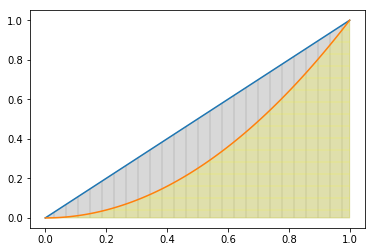

In [5]:
def f(x):
    return x

def g(x):
    return x**2

x = np.linspace(0,1,100)
plt.plot(x,f(x))
plt.plot(x,g(x))
plt.fill_between(x, f(x), color = "grey",alpha = 0.3, hatch = '|')
plt.fill_between(x, g(x), color = "yellow", alpha = 0.2, hatch = '-')

Note that the area between the two curves is simply the difference between the area under $f$ and the area under $g$.  The area between the two curves is the definite integral of top curve minus bottom curve. We can represent this area with a definite integral:

$$\int_0^1 x - x^2 ~ dx$$



In [6]:

x = sy.Symbol('x') # defines x as a symbol
sy.integrate(f(x) - g(x), (x, 0,1))  # integrates f(x)-g(x) with respect to x from 0 to 1. 

1/6

We can summarize this with a plot.

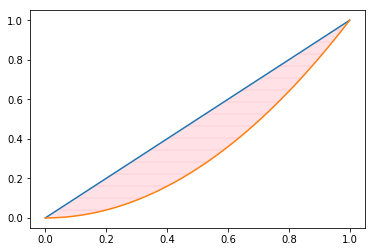

In [7]:
x = np.linspace(0,1,100)
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.fill_between(x, f(x), g(x), color = 'lightpink', alpha = 0.4, hatch = '-')

In this last example we were given the limits of integration (told between 0 and 1).   Sometimes we have to find where the functions intersect to determine the limits of integration. 

In [8]:
def f(x):
    return 12 - x**2

def g(x):
    return x**2 - 6

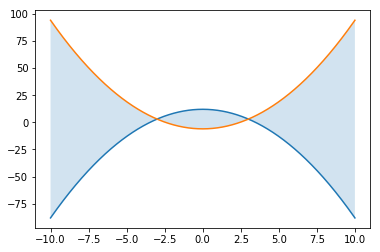

In [9]:
x = np.linspace(-10,10,1000)
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.fill_between(x, f(x), g(x), alpha = 0.2)

Suppose we want to find the area of the middle region here.  We would need to know the points of intersection of the curves and use these as boundaries for our definite integral.  We can find these with sympy, update the plot, and evaluate the integral.

In [10]:
x = sy.Symbol('x')
sy.solve(f(x) - g(x), x)  #this will solve where f(x)-g(x)=0

[-3, 3]

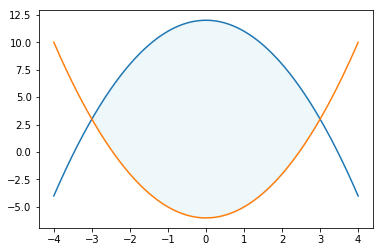

In [11]:
x = np.linspace(-4,4,1000)
fill = np.linspace(-3,3,1000)
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.fill_between(fill, f(fill), g(fill), color = 'lightblue', alpha = 0.2)

We see that they intersect at x=-3 and x=3, so we will integrate from -3 to 3. 

In [12]:
x = sy.Symbol('x')
sy.integrate(f(x) - g(x), (x, -3,3))

72

We can have regions that are determined by more than one set of intersections as well.  Here, we can determine the area over a domain where the curves switch positions.  For example, consider the functions $f(x) = x^3-3x+3$ and $g(x) = x+3$ 

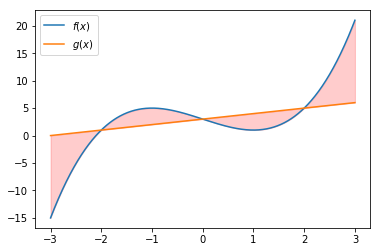

In [13]:
def f(x):
    return x**3-3*x+3

def g(x):
    return x+3

x = np.linspace(-3,3, 1000)
plt.plot(x, f(x), label = '$f(x)$')
plt.plot(x, g(x), label = '$g(x)$')
plt.fill_between(x, f(x), g(x), color = 'red', alpha = 0.2)
plt.legend(loc = 'best')

In [14]:
x = sy.Symbol('x')
y1 = x**3-3*x+3
y2 = x+3
sy.solve(y2 - y1)

[-2, 0, 2]

In [15]:
area_1 = sy.integrate(y2 - y1, (x, -2, 0))

In [16]:
area_2 = sy.integrate(y1 - y2, (x, 0, 2))

In [17]:
sy.pprint(area_1 + area_2)

-8


Notice that this one switched what was the top curve and the bottom curve part of the way through so we had to break it up into pieces based on which was the top curve. 


# Application example


Equality could be understood through looking at the distribution of wealth in a society.  Perfect wealth distribution would mean that all participants have the same share of wealth as everyone else.  We can represent this situation mathematically with a function $L(x) = x$ that we will call the **Lorenz Curve**. 

Concretely, if we were to look at every 20% of the population, we would see 20% of income.

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 20 |
| Lowest two - Fifths | 40 |
| Lowest three - Fifths | 60 |
| Lowest four - Fifths | 80 |
| Lowest five - Fifths | 100 |




In [18]:
percent = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
lorenz = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

Text(0.5, 1.0, 'Perfect Wealth Distribution')

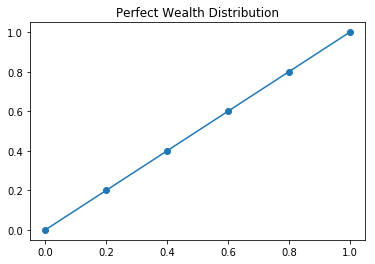

In [19]:
plt.plot(percent, lorenz, '-o')
plt.title("Perfect Wealth Distribution")

It is unlikely that we have perfect distribution of wealth in a society however.  For example, the following table describes the cumulative distribution of income in the United States for the year 1994.  

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 4.2 |
| Lowest two - Fifths | 14.2 |
| Lowest three - Fifths | 29.9 |
| Lowest four - Fifths | 53.2 |
| Lowest five - Fifths | 100.0 |

In [20]:
usa_94 = [0, 0.042, 0.142, 0.299, 0.532, 1.00]

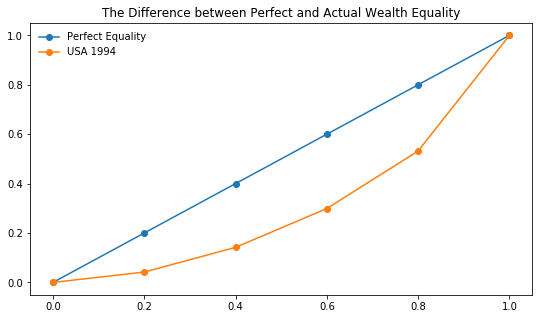

In [21]:
plt.figure(figsize = (9, 5))
plt.plot(percent, lorenz, '-o', label = 'Perfect Equality')
plt.plot(percent, usa_94, '-o', label = 'USA 1994')
plt.title("The Difference between Perfect and Actual Wealth Equality")
plt.legend(loc = 'best', frameon = False)

The area between these curves can be understood to represent the discrepency between perfect wealth distribution and levels of inequality.  Further, if we examine the ratio between this area and that under the **Lorenz Curve** we get the **Gini Index**.  

We have looked at finding area under a curve before.  Notice that cuurently we do not have a function to integrate to find the area.  What might you propose to do to find the area between these curves.  This will not give an exact answer but will give an approximation. 

One big issue remains however.   We don't have equations for the actual distribution of wealth.  We will use np.polyfit like we have done before.  

### Quadratic Fit

The curve in the figure above representing the actual distribution of wealth in the USA in 1994 can be approximated by a polynomial function.  NumPy has a function called `polyfit` that will fit a polynomial to a set of points.  Here, we use `polyfit` to fit a quadratic function to the points.

In [22]:
np.polyfit(percent, usa_94, deg=2)

array([ 1.18839286, -0.24167857,  0.02092857])

In [23]:
coefs = np.polyfit(percent, usa_94, deg = 2)

In [24]:
def fit(x):
    return coefs[0]*x**2 + coefs[1]*x + coefs[2]

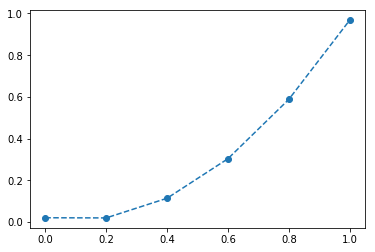

In [25]:
plt.plot(percent, [fit(i) for i in percent], '--o')

In [26]:
fit = np.poly1d(np.polyfit(percent, usa_94, 2)) 

In [27]:
fit

poly1d([ 1.18839286, -0.24167857,  0.02092857])

In [28]:
fit(0)

0.020928571428571605

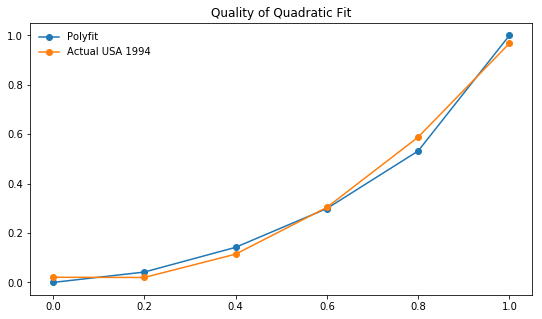

In [29]:
plt.figure(figsize = (9, 5))
plt.plot(percent, usa_94, '-o', label = 'Polyfit')
plt.plot(percent, fit(percent), '-o', label = 'Actual USA 1994')
plt.title("Quality of Quadratic Fit")
plt.legend(loc = 'best', frameon = False)

#### Getting the Fit

Below, we return to the complete picture where we plot our fitted function and the **Lorenz Curve** and shade the area that represents the difference in income distribution.

How would you propose finding the area between the perfect equality and the fitted function of the actual data from 1994?

Let's visualize to find out.

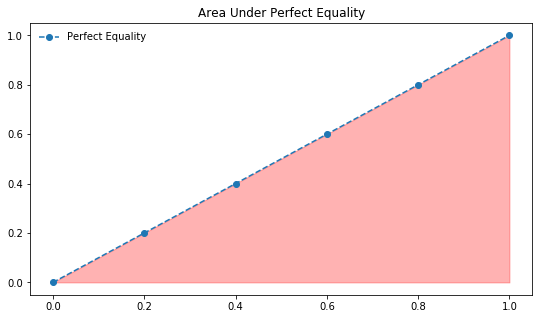

In [30]:
plt.figure(figsize = (9, 5))
plt.plot(percent, lorenz, '--o', label = 'Perfect Equality')
plt.fill_between(percent, lorenz, 0, alpha = 0.3, color = 'red')
plt.title("Area Under Perfect Equality")
plt.legend(loc = 'best', frameon = False)

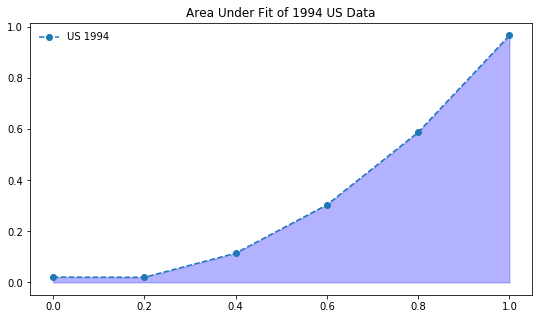

In [31]:
plt.figure(figsize = (9, 5))
plt.plot(percent, fit(percent), '--o', label = 'US 1994')
plt.fill_between(percent, fit(percent), 0, alpha = 0.3, color = 'blue')
plt.title("Area Under Fit of 1994 US Data")
plt.legend(loc = 'best', frameon = False)

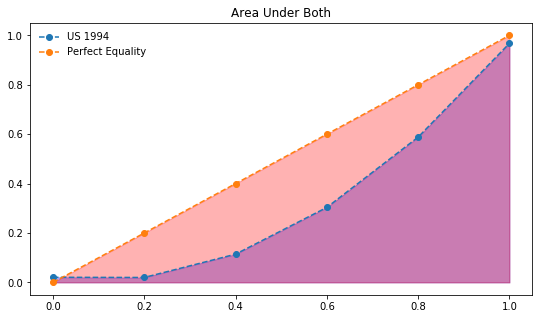

In [32]:
plt.figure(figsize = (9, 5))
plt.plot(percent, fit(percent), '--o', label = 'US 1994')
plt.fill_between(percent, fit(percent), 0, alpha = 0.3, color = 'blue')
plt.plot(percent, lorenz, '--o', label = 'Perfect Equality')
plt.fill_between(percent, lorenz, 0, alpha = 0.3, color = 'red')
plt.title("Area Under Both")
plt.legend(loc = 'best', frameon = False)

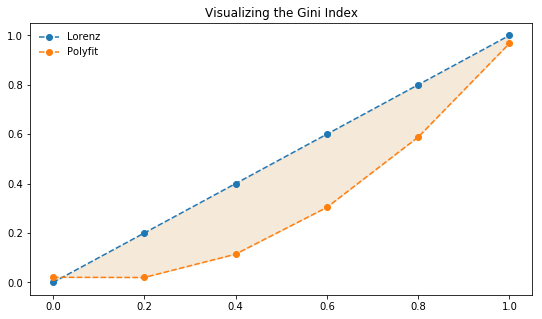

In [33]:
plt.figure(figsize = (9, 5))
plt.plot(percent, lorenz, '--o', label = 'Lorenz')
plt.plot(percent, fit(percent), '--o', label = 'Polyfit')
plt.fill_between(percent, lorenz, fit(percent), alpha = 0.3, color = 'burlywood')
plt.title("Visualizing the Gini Index")
plt.legend(loc = 'best', frameon = False)

How would you propose finding the area between these two?

Idea: Subtract the areas 

Now, we want to compute the ratio between the area between the curves to that under the **Lorenz Curve**.  We can do this easily in Sympy by declaring $x$ a symbol and substituting it into our fit function then integrating this.

In [34]:
import sympy as sy

In [35]:
x = sy.Symbol('x')
fit(x)

x*(1.18839285714286*x - 0.241678571428572) + 0.0209285714285716

In [36]:
A_underperf = sy.integrate(((x)), (x, 0,1))

In [37]:
A_underfit = sy.integrate((fit(x)), (x, 0, 1))

In [38]:
A_betweensub= A_underperf-A_underfit

In [39]:
A_between = sy.integrate((x - fit(x)), (x, 0, 1))

In [40]:
A_underperf = sy.integrate(x, (x, 0,1))

In [41]:
A_between/A_underperf

0.407559523809523

In [42]:
2*A_between

0.407559523809523

The coefficient of inequality, or Gini Index, of a Lorenz curve is $$L=2 \int_0^1 [x-f(x)] dx$$

The coefficient of inequality is a number between 0 and 1.  For example a coefficient of 0 implies that the income distribution is perfectly uniform.  

### Inequality through Time

Now that we understand how to compute the Gini Index, we want to explore what improving the gap in wealth distribution would mean.  

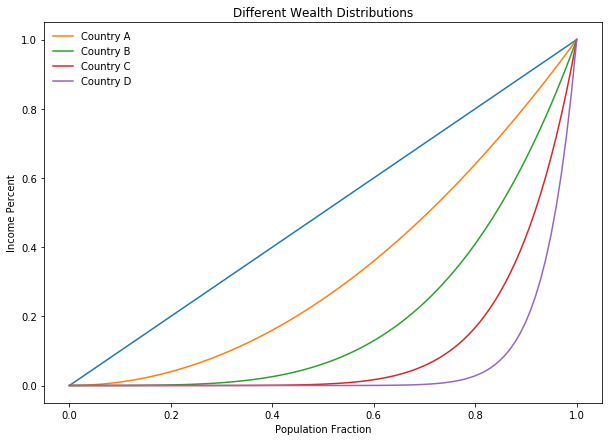

In [43]:
x = np.linspace(0, 1, 100)
plt.figure(figsize = (10, 7))
plt.plot(x, x)
plt.plot(x, x**2, label = "Country A")
plt.plot(x, x**4, label = "Country B")
plt.plot(x, x**8, label = "Country C")
plt.plot(x, x**16, label = "Country D")
plt.ylabel("Income Percent")
plt.xlabel("Population Fraction")
plt.title("Different Wealth Distributions")
plt.legend(loc = "best", frameon = False)

Which of the above countries do you believe is the most equitable?  Why?



### Census Bureau Data and Pandas

There are many organizations that use the Gini Index to this day.  The OECD, World Bank, and US Census all track Gini Indicies.  We want to investigate the real data.  To do so, we will use the Pandas library.  

The table below gives distribution data for the years 1970, 1980, 1990, and 2000.  

| x | 0.0 | 0.2 | 0.4 | 0.6 | 0.8 | 1.0 |
| --- | --- | --- | --- | --- | --- | --- |
| 1970 | 0.000 | 0.041 | 0.149 | 0.323 | 0.568 | 1.000 |
| 1980 | 0.000 | 0.042 | 0.144 | 0.312 | 0.559 | 1.000 |
| 1990 | 0.000 | 0.038 | 0.134 | 0.293 | 0.530 | 1.000 |
| 2000 | 0.000 | 0.036 | 0.125 | 0.273 | 0.503 | 1.000 |

#### Creating the DataFrame

We will begin by creating a table from this data by entering lists with these values and creating a DataFrame from these lists.  



In [44]:
import pandas as pd
seventies = [0, 0.041, 0.149, 0.323, 0.568, 1.0]
eighties = [0, 0.042, 0.144, 0.312, 0.559, 1.0]
nineties = [0, 0.038, 0.134, 0.293, 0.53, 1.0]
twothou = [0, 0.036, 0.125, 0.273, 0.503, 1.0]

In [45]:
df = pd.DataFrame({'1970s': seventies, '1980s':eighties, '1990s': nineties,
                  '2000s': twothou, 'perfect': [0, 0.2, 0.4, 0.6, 0.8, 1.0]})
df.head()

,1970s,1980s,1990s,2000s,perfect
0,0.000,0.000,0.000,0.000,0.0
1,0.041,0.042,0.038,0.036,0.2
2,0.149,0.144,0.134,0.125,0.4
3,0.323,0.312,0.293,0.273,0.6
4,0.568,0.559,0.530,0.503,0.8


#### Plotting from the DataFrame

We can plot directly from the dataframe.  The default plot generates lines for each decades inequality distribution.  There are many plot types available however, and we can specify them with the `kind` argument as demonstrated with the density plot that follows. What do these visualizations tell you about equality in the USA based on this data?

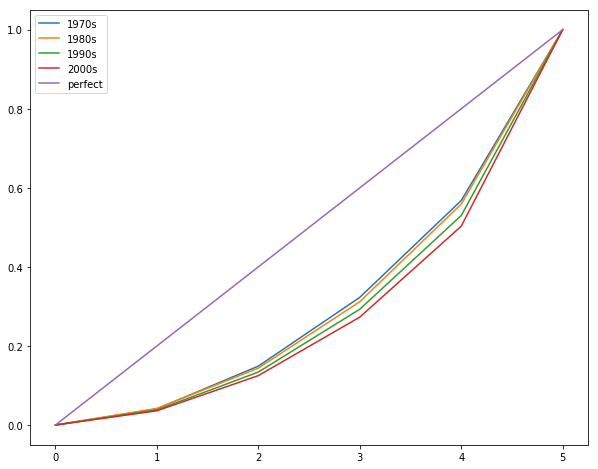

In [46]:
df.plot(figsize = (10, 8))

# Consumer and Producer Surplus
We have talked about **supply** and **demand** curves before.  

A **supply curve** is a cost of production function that relates some quantity of goods to a price that attracts this amount at market.  

A **demand curve** is a function that relates a quantity of goods to a price that the market would be cleared of that quantity.

For example, suppose we have a supply curve $S$ as:

$$S(x) = x^2$$

and a demand curve $D$ of:

$$D(x) = (x - 20)^2$$

We can plot these as follows.

In [47]:
def S(x):
    return (x**2)

def D(x):
    return (x - 20)**2

x = np.linspace(0, 16, 1000)



Text(0, 0.5, 'Price')

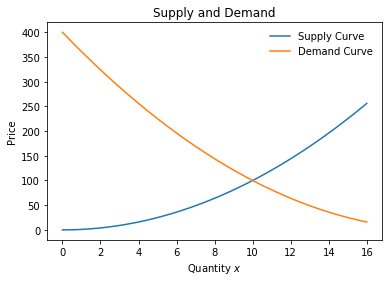

In [48]:
plt.plot(x, S(x), label = "Supply Curve")
plt.plot(x, D(x), label = "Demand Curve")
plt.title("Supply and Demand")
plt.legend(frameon = False)
plt.xlabel("Quantity $x$")
plt.ylabel("Price")

### Equilibrium Price

Where the Supply and Demand curves intersect, we have the **equilibrium price** for the good under consideration.  In order to find this value, we need to solve the equation:

$$S(x) = D(x)$$

We can use Sympy to accomplish this with the `Eq` and `Solve` commands.  

In [49]:
q = sy.Symbol('q')
eq = sy.Eq(S(q), D(q))
sy.solve(eq)

[10]

In [50]:
S(10)

100

Now, we can update our plot to include this point and add some text and an arrow pointing to the equilibrium point using the matplotlib's `annotate` function.  The draws an arrow with some text to a point on the graph.

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(10, 250, 'Equilibrium at (10, 100)')

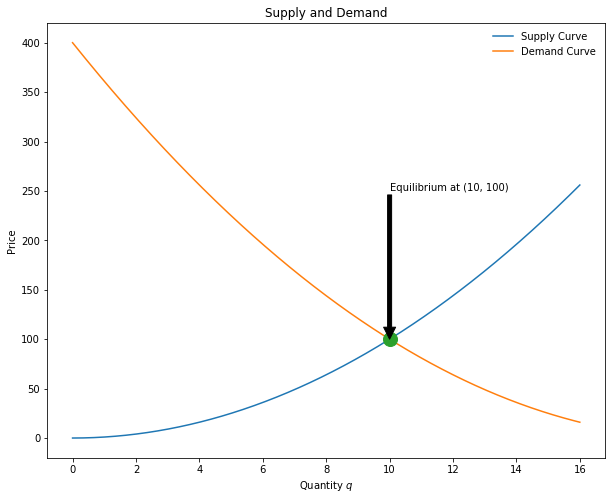

In [51]:
plt.figure(figsize= (10, 8))#create figure and reset q to be numbers
q = np.linspace(0, 16, 1000)


plt.plot(q, S(q), label = "Supply Curve")#plot supply, demand, and equilibrium points
plt.plot(q, D(q), label = "Demand Curve")
plt.plot(10, 100, 'o', markersize = 14)


plt.title("Supply and Demand")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("Price")


ax = plt.axes()#add arrow with annotation
ax.annotate('Equilibrium at (10, 100)', xy=(10,100), xytext=(10, 250), arrowprops=dict(facecolor='black'))

### Price Discrimination

Price discrimination refers to the different prices that different consumers are willing to pay for the same product.  For example, some people may be willing to pay \$16 for a six pack of beer while others would refuse.  In order to address different consumers, a corporation might do something like market the same beer under a different logo and name in different kinds of stores.

If the goods producer is able to determine this perfectly, they will have achieved perfect **price discrimination**.  The beer example demonstrates only a partial price discrimination.  An example of perfect price discrimination might be a pay what you want approach where each consumer determine their own price for a good.

In a partial price discrimination scenario, we would have a picture like our step functions, where the width of each rectangle represents a quantity of a good and the height represents the price that this amount of goods sells for.  

Let's visualize the Partial and Perfect Price discrimination situation where we have $\Delta x = 1$.

In [52]:
x = np.arange(0, 16, 1)

Text(10, 250, 'sell $\\Delta x$ at price $p$')

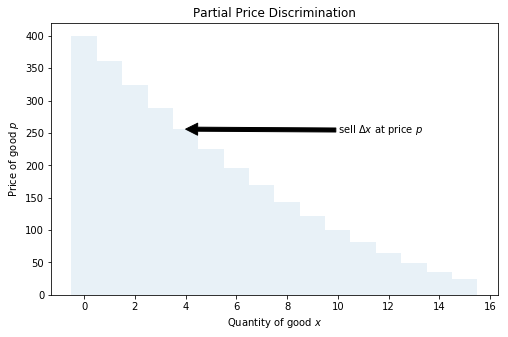

In [53]:
plt.figure(figsize = (8, 5))
plt.bar(x, D(x), alpha = 0.1, width = 1)
plt.title("Partial Price Discrimination")

plt.xlabel("Quantity of good $x$")
plt.ylabel("Price of good $p$")
ax = plt.axes()
ax.annotate('sell $\Delta x$ at price $p$', xy=(4, D(4)), xytext=(10, 250), arrowprops=dict(facecolor='black'))

The area of one of the rectangles then represents the **revenue** to the producer.  Consider the first rectangle.  Here, we have 1 unit of a good and sell this at 400 dollars.  Similarly, we sell a second unit of this good for 300.  From these sales we would have made 700 in total.  

$$ \text{Revenue} = \sum_{i = 1}^n \Delta x D(i\Delta x)$$

Perfect Price Discrimination would be modeled by the continuous case and the Revenue by the Definite Integral.  

Text(10, 250, 'Area Under Curve is Revenue \n$\\int_0^{16}D(x) dx$')

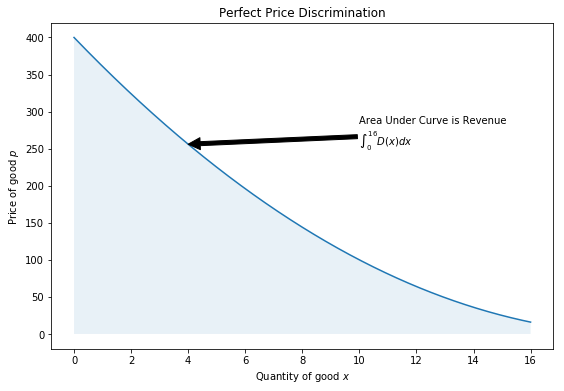

In [54]:
x = np.linspace(0, 16, 1000)
plt.figure(figsize = (9, 6))
plt.plot(q, D(q))
plt.fill_between(q, D(q), alpha = 0.1)
plt.title("Perfect Price Discrimination")

plt.xlabel("Quantity of good $x$")
plt.ylabel("Price of good $p$")
ax = plt.axes()
ax.annotate('Area Under Curve is Revenue \n$\int_0^{16}D(x) dx$', xy=(4, D(4)), xytext=(10, 250), arrowprops=dict(facecolor='black'))

### The Consumer Surplus

When a marketplace finds consumers paying the same price for a good, we are at the **equilibrium price**.  Here, if you think about moving backwards from equilibrium, the price of the good rises, its suppy falls, and there are fewer transactions.  Another way to interpret the area under the Demand curve, is as the value to consumers.   If the market has set a fixed price on some good related to the demanded units, the those consumers who would be willing to pay a higher unit price than the equilibrium price for the good would technically be experiencing savings.  This difference between what the consumer *would* be willing to pay and what they *actually* pay is called a cthe **consumer surplus**. 

If there is a difference between this value and what the consumers end up paying, we have a consumer surplus.  This is represented graphically as the area determined by the rectangle formed by the equilibrium price.  The difference between the area under the Demand curve and this rectangle is the **consumer surplus**.

Text(12, 100, 'Total Revenue')

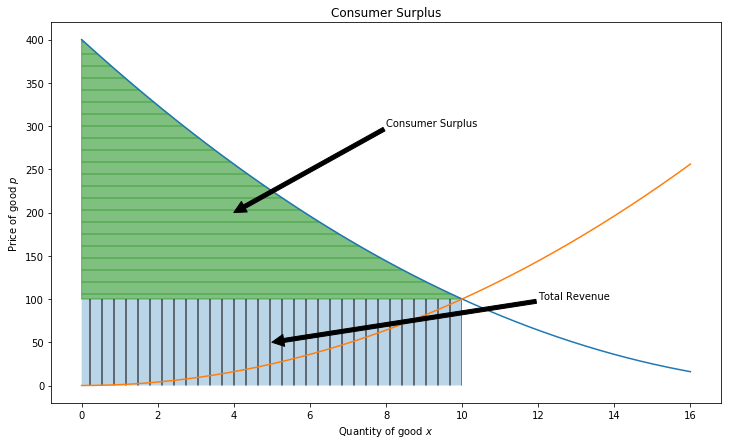

In [55]:
plt.figure(figsize = (12,7))
plt.plot(x, D(x))
plt.plot(x, S(x))
plt.fill_between(x, D(x), 100, where = (D(x) > 100), color = 'green', alpha = 0.5, hatch = '-')
plt.fill_between(x, 100, where = (x<10), alpha = 0.3, hatch = '|')

plt.title("Consumer Surplus")
plt.xlabel("Quantity of good $x$")
plt.ylabel("Price of good $p$")
ax = plt.axes()
ax.annotate('Consumer Surplus', xy=(4, 200), xytext=(8, 300), arrowprops=dict(facecolor='black'))
ax.annotate('Total Revenue', xy = (5, 50), xytext = (12,100), arrowprops=dict(facecolor='black'))

This would be determined by the area under the Demand Curve, but above the horizontal line formed by the equlibrium price $\overline p$ and $ \overline x$ is the quantity sold.  Thus, we can represent this with the definite integral:

$$CS= \int_0^{\overline x} (D(x) - \overline p )dx$$

When fixed market price has been established for a commodity and its corresponding quantity of units will be mad available in the market by the suppliers, then the suppliers who are willing to make the good available at a lower price can gain from the market price being set at p bar.  The difference between what the suppliers actually receive and what they would be willing to receive is called the **producers surplus**.  This equation is 
$$PS= \int_0^{\overline x} (\overline p - S(x) )dx$$

where $S(x)$ is the supply function.  



#### Example 

Suppose the supply curve is approximated by the function 

$$p = S(x) = \frac{x^2}{500,000}$$

and the demand curve by the function 

$$p = D(x) = 144 - \frac{x}{500}$$

for $0 \leq x \leq 65,000$.  Determine the equilibrium price, Consumer Surplus, and Producer Surplus.

In [56]:
def S(x): return (x**2)/(500000)
def D(x): return 144- (x)/500

In [57]:
x = sy.Symbol('x')
eq = sy.Eq(S(x), D(x))
sy.solve(eq)

[-9000, 8000]

So we will use 8000 as $\overline x$ and we need to find $\overline p$

In [58]:
S(8000), D(8000)

(128.0, 128.0)

So $\overline p$ is 128. 

Consumer surplus

In [59]:
sy.integrate((D(x)-128) , (x, 0, 8000))

64000

Producer Surplus

In [60]:
sy.integrate((128-S(x)), (x, 0, 8000))

2048000/3

In [61]:
float(2048000/3)

682666.6666666666

In [62]:
#do not change this cell
def integrate(f, a, b, n=10000000):
    x = np.linspace(a, b, n)
    width = (b-a)/n 
    heights = [f(a)]
    for i in range(n):
        next = f(i*width)
        heights.append(next)
    areas = [i*width for i in heights]
    total_area = sum(areas)
    print('The area under the curve \nis equal to', round(total_area, 2))
    plt.plot(x, f(x))
    plt.fill_between(x, f(x), alpha = 0.3, color = 'blue', hatch = '|')
    plt.title('Sorry this took so Long!')

## Present and Future Value of Income Streams 

Think about the very simple example we started with in the last lab about adding up savings. 

If $R(t)=$ Rate of income generation at any time $t$

$r$= interest rate compounded continuously

$T$ = term 

If we divide the time interval $[0,T]$ into $n$ subintervals of equal length $\Delta t$. 

Income generated over the time interval $[0,t_1]$ is approximately $R(t_1) \Delta t$. 

The future value of this amount, T years from now is calculated at time $t_1$ is $[R(t_1) \Delta t] e^{r(T-t_1)}$. 
Therefore, the future value over the interval would be these added up, which would end up being the Riemann sum of the function $e^{rT}R(t)e^{-rt}$ over the interval $[0,T]$.  

So the future value is given by $$A=e^{rt} \int_0^T R(t) e^{-rt}dt$$


Crystal Car Was recently bought an automatic car wash machine that is expected to generate 40,000 dollars in revenue per year $t$ years from now, for the next 5 years.  If the income is reinvested in a business earning interest at a rate of 12\% per year compounded continuously, find the total accumulated value of this income stream at the end of 5 years. 


In [63]:
def f(x): return 40000*(np.exp((-0.12)*x))


The area under the curve 
is equal to 150398.57


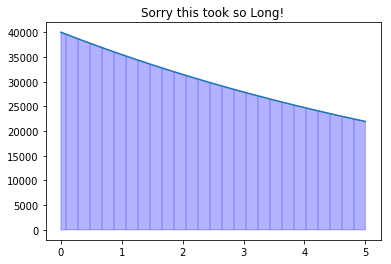

In [64]:

integrate(f,0,5,n=100000)

In [65]:
np.exp(.12*5)* (150398.57)

274044.061948848

In five years this income stream has generated 274044.06 dollars.

### Problems



# 1.
Find the anti-derivative  of the following:



 $f(x)=-4x^3+5x^2-\frac{4}{x}$

# 2. 
Find the area totally enclosed by the two curves

$f(x)=x^4-2x^2+2$ and $g(x)=4-2x^2$


# 3.
The table below shows how arable land is distributed among farmers in Blivia, Denmark, and the United States.  In which country is the land most equally distributed?  The least?  Make sure you write a sentence at the end explaining which is which and why.

| Fraction of Farmers | Fraction of Land Bolivia | Denmark | United States |
| -----------------   | -----------------------  | -------- | ------------ |
| 0.0 | 0.0 | 0.0 | 0.0 |
| 0.1 | 0.0 | 0.06 | 0.025 |
| 0.2 | 0.0 | 0.12 | 0.05 |
| 0.3 | 0.0 | 0.18 | 0.075 |
| 0.4 | 0.0 | 0.24 | 0.10 | 
| 0.5 | 0.010 | 0.30 | 0.13 |
| 0.6 | 0.016 | 0.36 | 0.18 |
| 0.7 | 0.022 | 0.45 | 0.22 |
| 0.8 | 0.03 | 0.54 | 0.28 |
| 0.9 | 0.04 | 0.70 | 0.42 |
| 1.0 | 1.00 | 1.00 | 1.00 |

# 4. 
The quantity demanded $x$ (in units of a hundred) of the Mikado miniature cameras per week is related to the unit price $p$ (in dollars) by $$D(x)=p=-0.2x^2+80$$ and the quantity $x$ (in units of a hundred) that the supplier is willing to make available to the market is related to the unit price $p$ (in dollars) by $$S(x)=p=0.1x^2+x+40$$

If the market price is set at the equilibrium price, find the consumers' surplus and find the producers' surplus. 

# 5. 
Andy deposited \$150 per month in a savings account paying 5\% per year compounded continuously.  Estimate the amount that will be in his account after 15 years. 


# Think about what you learned today and write about it! 
Write a short paragraph about what you learned in this notebook.  This needs to be a thoughtful, reflective paragraph.  There should be reflection on the mathematics content you learned.  
You may want to review the goals of this notebook (at the top).
***IF I DO NOT SEE A REFLECTION ON MATHEMATICS CONTENT AND WHAT YOU LEARNED ABOUT THAT YOU WILL LOSE 3 POINTS AUTOMATICALLY***  Stating "I did the integral" is not a reflection on math content

# Please submit the .ipynb file on Blackboard and please print (and bring with you to class) the portion from "For You to Do" to the end and then do print preview, save as pdf. 
Please make sure you are submitting the correct type of file (.ipynb) and that it is named correctly or points will be deducted. 